In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
# plt.style.use('seaborn-paper')
import seaborn as sns
import joblib
# plt.rcParams['font.family']='Times New Roman,Microsoft YaHei'# 设置字体族，中文为微软雅黑，英文为Times New Roman
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.patheffects as path_effects
from matplotlib.lines import Line2D
from matplotlib import patheffects
from adjustText import adjust_text

In [2]:
datajh=pd.read_csv("groupedjhS.csv")
datacm=pd.read_csv("groupedcmS.csv")
datajhsoa=pd.read_csv("groupedjhSOA.csv")
datacmsoa=pd.read_csv("groupedcmSOA.csv")

In [3]:
#温度影响
VOCs = ['Methyl Mercaptan', '1,3-Butadiene', 'Butene', 'Acetone/Butane', 'n-Propanol',
        'Dimethyl Sulfide/Ethyl Mercaptan', 'Chloroethane', 'Isoprene', 'Pentene', 'Pentane/Isopentane',
        'Dimethylformamide', 'Ethyl Formate', 'Carbon Disulfide/Propyl Mercaptan', 'Benzene', 'Cyclohexene',
        'Hexene/Methylcyclopentane', 'n-Hexane/Dimethylbutane', 'Ethyl Sulfide/Butyl Mercaptan', 'Toluene', 'Aniline',
        'Dimethyl Disulfide', '1,1-Dichloroethylene', 'Methylcyclohexane', 'n-Heptane', 'Triethylamine',
        'n-Propyl Acetate', 'Diethylene Triamine', 'Styrene', 'Xylene/Ethylbenzene', '1,3-Dichloropropene', 'n-Octane',
        'n-Butyl Acetate', 'Hexyl Mercaptan', 'Xylenol', 'Trichloroethylene', 'Diethylbenzene', 'Methyl Benzoate',
        'Trimethyl Phosphate', 'n-Decanol', 'Dichlorobenzene', 'Diethyl Aniline', 'Undecane', 'Tetrachloroethylene',
        'n-Dodecane', 'Dibromomethane', '1,2,4-Trichlorobenzene', 'n-Tridecane', '1,2-Dibromoethane']

datajhsoa["SOA"] = 0
datajh["SOA"] = 0
for i in datajhsoa.columns[(datajhsoa.columns.get_loc("0.25um")):(datajhsoa.columns.get_loc("0.30um"))]:
    datajhsoa["SOA"] = datajhsoa["SOA"] + datajhsoa[i]
    datajh["SOA"] = datajh["SOA"] + datajh[i]
datajhsoa["CSOA"] = 0
for i in datajhsoa.columns[(datajhsoa.columns.get_loc("C0.25um")):(datajhsoa.columns.get_loc("C0.30um"))]:
    datajhsoa["CSOA"] = datajhsoa["CSOA"] + datajhsoa[i]
datacmsoa["SOA"] = 0
datacm["SOA"] = 0
for i in datacmsoa.columns[(datacmsoa.columns.get_loc("0.25um")):(datacmsoa.columns.get_loc("0.30um"))]:
    datacmsoa["SOA"] = datacmsoa["SOA"] + datacmsoa[i]
    datacm["SOA"] = datacm["SOA"] + datacm[i]
datacmsoa["CSOA"] = 0
for i in datacmsoa.columns[(datacmsoa.columns.get_loc("C0.25um")):(datacmsoa.columns.get_loc("C0.30um"))]:
    datacmsoa["CSOA"] = datacmsoa["CSOA"] + datacmsoa[i]
datajh['place'] = 'JH'
datacm['place'] = 'CM'
dataall = pd.concat([datajh, datacm], axis=0)
dataall.columns = ['Time', 'TVOCs', 'Methyl Mercaptan', '1,3-Butadiene', 'Butene', 'Acetone/Butane', 'n-Propanol',
                   'Dimethyl Sulfide/Ethyl Mercaptan', 'Chloroethane', 'Isoprene', 'Pentene', 'Pentane/Isopentane',
                   'Dimethylformamide', 'Ethyl Formate', 'Carbon Disulfide/Propyl Mercaptan', 'Benzene', 'Cyclohexene',
                   'Hexene/Methylcyclopentane', 'n-Hexane/Dimethylbutane', 'Ethyl Sulfide/Butyl Mercaptan', 'Toluene',
                   'Aniline', 'Dimethyl Disulfide', '1,1-Dichloroethylene', 'Methylcyclohexane', 'n-Heptane',
                   'Triethylamine', 'n-Propyl Acetate', 'Diethylene Triamine', 'Styrene', 'Xylene/Ethylbenzene',
                   '1,3-Dichloropropene', 'n-Octane', 'n-Butyl Acetate', 'Hexyl Mercaptan', 'Xylenol',
                   'Trichloroethylene', 'Diethylbenzene', 'Methyl Benzoate', 'Trimethyl Phosphate', 'n-Decanol',
                   'Dichlorobenzene', 'Diethyl Aniline', 'Undecane', 'Tetrachloroethylene', 'n-Dodecane',
                   'Dibromomethane', '1,2,4-Trichlorobenzene', 'n-Tridecane', '1,2-Dibromoethane', '0.25um', '0.28um',
                   '0.30um', '0.35um', '0.40um', '0.45um', '0.50um', '0.58um', '0.65um', '0.70um', '0.80um', '1.00um',
                   '1.30um', '1.60um', '2.00um', '2.50um', '3.00um', '3.50um', '4.00um', '5.00um', '6.50um', '7.50um',
                   '8.50um', '10.00um', '12.50um', '15.00um', '17.50um', '20.00um', '25.00um', '30.00um', '32.00um',
                   'PM10', 'PM2.5', 'PM1', 'SO2', 'NOx', 'NO', 'NO2', 'CO', 'O3', 'NO2.1', 'NegativeOxygenIons',
                   'Radiation', 'Temperature', 'Humidity', 'WindSpeed', 'Hour_Min_Sec', 'Hour_Min', 'Hour', 'Month',
                   'Day', 'Datetime', 'seconds', 'SOA', 'place']


In [4]:
from scipy.optimize import curve_fit
from scipy.stats import zscore
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.dates as mdates
from scipy.stats import t


# 定义与均值的关系函数（二次函数）
def mean_relation(T, Q0, a, v0):
    return Q0 + (a * T**2) / 2 + T * v0

# 定义与方差的关系函数（三次函数）
def std_dev_relation(T, k, sigma0):
    return (k**2 * T**3) / 3 + k * T**2 * sigma0 + T * sigma0**2


# 定义去除离群值的函数（使用 Z-score 方法）
def remove_outliers(data):
    z_scores = zscore(data)
    return data[(np.abs(z_scores) < 3)]  # 通常使用 3 作为 Z-score 的阈值
    
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon
from shapely.ops import unary_union
from scipy.stats import norm

def compute_area(points):
    # 计算点的凸包区域
    hull = ConvexHull(points)
    polygon = Polygon(points[hull.vertices])
    return polygon.area

def monte_carlo_r_squared_area(T, mean_params, std_dev_params, real_data, num_simulations=1000):
    original_points = np.column_stack((T, real_data))
    original_area = compute_area(original_points)

    simulation_areas = []
    overlap_areas = []

    for _ in range(num_simulations):
        simulated_path = norm.rvs(
            loc=mean_relation(T, *mean_params),
            scale=np.sqrt(std_dev_relation(T, *std_dev_params)),
            size=len(T)
        )
        simulated_points = np.column_stack((T, simulated_path))
        sim_area = compute_area(simulated_points)
        simulation_areas.append(sim_area)

        original_polygon = Polygon(original_points[ConvexHull(original_points).vertices])
        simulated_polygon = Polygon(simulated_points[ConvexHull(simulated_points).vertices])
        intersection_area = original_polygon.intersection(simulated_polygon).area
        overlap_areas.append(intersection_area)
    
    mean_overlap_area = np.mean(overlap_areas)
    mean_simulation_area = np.mean(simulation_areas)

    # Calculate R² based on area overlap
    r_squared_area = mean_overlap_area / original_area
    return min(max(r_squared_area, 0), 1)  # Ensure R² is in [0, 1]

# 定义异常值清理函数
def clean_data(df, columns, threshold=3):
    for col in columns:
        df = df[np.abs(zscore(df[col])) < threshold]
    return df.reset_index(drop=True)

def hour_min_to_float(hour_min_str):
    hour, minute = map(int, hour_min_str.split(":"))
    return hour + minute / 60.0

import re
def scientific_notation_with_superscript(value, precision=3):
    # 如果值为零，直接返回零字符串格式
    if value == 0:
        return f"{value:.{precision}f}"
    
    # 格式化为科学记数法，并去掉指数部分的前导零
    formatted_value = f"{value:.{precision}e}"
    formatted_value = formatted_value.replace('e+', 'x10^').replace('e-', 'x10^-')
    formatted_value = re.sub(r'x10\^([-+]?)0*(\d+)', r'x10^\1\2', formatted_value)  # 保留负号
    
    # 将指数部分的数字替换为 Unicode 上标
    superscript_map = str.maketrans("0123456789-", "⁰¹²³⁴⁵⁶⁷⁸⁹⁻")
    match = re.search(r'x10\^([-+]?\d+)', formatted_value)
    if match:
        exponent = match.group(1).translate(superscript_map)
        formatted_value = re.sub(r'x10\^[-+]?\d+', f'x10{exponent}', formatted_value)
         # 如果是 x10⁰ 则移除
        if 'x10⁰' in formatted_value:
            formatted_value = formatted_value.replace('x10⁰', '')
    else:
        # 如果没有 x10^，直接返回数值部分
        formatted_value = formatted_value.split('x10')[0]
         # 如果是 x10⁰ 则移除
        if 'x10⁰' in formatted_value:
            formatted_value = formatted_value.replace('x10⁰', '')
        
    return formatted_value

from scipy.stats import norm, expon, gamma, lognorm, beta, kstest, shapiro
def normal_distribution_fit_and_test(grouped_by_hour):
    normality_results = {}
    for hour, group in grouped_by_hour:
        # Fit normal distribution and get parameters
        params = norm.fit(group)
        # Perform Shapiro-Wilk test
        _, p_value = shapiro(group)
        # Check if data is normally distributed based on p-value
        is_normal = True if p_value > 0.05 else False
        normality_results[hour] = (
        params[0], params[1], p_value, is_normal)  # params[0]: mean, params[1]: standard deviation

    normality_df = pd.DataFrame(normality_results).T
    normality_df.columns = ["Mean", "Standard Deviation", "P-Value", "Is Normal"]
    normality_df.reset_index(inplace=True)
    normality_df.rename(columns={'index': 'Hour'}, inplace=True)

    return normality_df

In [5]:
# 从 dataall 中筛选出 JH 和 CM 地点的数据
data_jh = dataall[dataall['place'] == 'JH'].copy()
data_cm = dataall[dataall['place'] == 'CM'].copy()
data = dataall.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()


In [6]:


def create_models_for_location(data_location):
    # 计算每小时的均值
    datare = data_location.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()
    dataj = pd.DataFrame({
        "Time": pd.to_datetime(datare["Hour_Min"]),
        "T": datare["Temperature"],
        "hv": datare["Radiation"],
        "RH": datare["Humidity"],
        "O3": datare["O3"],
        "NOx": datare["NOx"],
        "SO2": datare["SO2"],
        "SOA": datare["SOA"],
        "K": 1,
        'Isoprene': datare["Isoprene"]
    })

    # 计算交互变量
    dataj["HNO3"] = dataj["RH"] * dataj["NOx"]
    dataj["H2SO4"] = dataj["RH"] * dataj["SO2"]
    dataj["H2SO403"] = dataj["RH"] * dataj["SO2"] * dataj["O3"]
    dataj["HNO3O3"] = dataj["RH"] * dataj["NOx"] * dataj["O3"]
    dataj["O3hv"] = dataj["O3"] * dataj["hv"]

    variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3hv", "K", "hv"]

    # 模型 1：直接使用观测到的 Isoprene 浓度
    dataj["BVOCs"] = datare["Isoprene"]
    for var in variables_to_regress:
        dataj[var + "_BVOCs"] = dataj[var] * dataj["Isoprene"]

    # 模型 2：使用温度拟合 Isoprene 的均值和方差，再以方差为权重拟合 SOA
    data_grouped = data_location.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()
    data_grouped["Concentration"] = data_grouped["Isoprene"]
    grouped_by_hour = data_grouped.groupby('Hour')
    normality_df = normal_distribution_fit_and_test(grouped_by_hour["Isoprene"])
    normality_df['T'] = data_grouped.groupby('Hour').mean(numeric_only=True)["Temperature"]

    # 提取数据
    T = normality_df['T'].values
    mean_values = normality_df['Mean'].astype("float").values
    std_dev_values = normality_df['Standard Deviation'].astype("float").values ** 2

    # 去除离群值
    mean_values_filtered = remove_outliers(mean_values)
    std_dev_values_filtered = remove_outliers(std_dev_values)
    T_filtered_mean = T[np.isin(mean_values, mean_values_filtered)]
    T_filtered_std_dev = T[np.isin(std_dev_values, std_dev_values_filtered)]

    # 拟合模型
    params_mean, _ = curve_fit(mean_relation, T_filtered_mean, mean_values_filtered, method='trf', maxfev=10000)
    params_std_dev, _ = curve_fit(std_dev_relation, T_filtered_std_dev, std_dev_values_filtered, method='trf')

    # 计算 fitted Isoprene 和权重
    mean_isoprene = mean_relation(dataj["T"], *params_mean)
    std_dev_isoprene = std_dev_relation(dataj["T"], *params_std_dev)
    dataj["Isoprene_fitted"] = mean_isoprene
    weights = 1 / std_dev_isoprene  # 使用方差的倒数作为权重

    for var in variables_to_regress:
        dataj[var + "_BVOCs"] = dataj[var] * dataj["Isoprene_fitted"]

    X2 = dataj[[var + "_BVOCs" for var in variables_to_regress]]
    Y2 = dataj["SOA"]
    model2 = sm.WLS(Y2, X2, weights=weights).fit(cov_type='HC3')

    # 输出模型
    return model2, params_mean, params_std_dev


In [7]:
modelall,params_mean,params_std_dev=create_models_for_location(dataall)

C:\Users\aa271\AppData\Local\Temp\ipykernel_26284\4164117127.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  "Time": pd.to_datetime(datare["Hour_Min"]),


In [8]:
data_location=dataall.copy()
params_mean=params_mean
params_std_dev=params_std_dev
model=modelall

# 计算每小时的均值
datare = data_location.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()
dataj = pd.DataFrame({
    "T": datare["Temperature"].mean(),
    "hv": datare["Radiation"].mean(),
    "RH": datare["Humidity"].mean(),
    "O3": datare["O3"].mean(),
    "NOx": datare["NOx"].mean(),
    "SO2": datare["SO2"].mean(),
    "SOA": datare["SOA"].mean(),
    "K": 1,
    'Isoprene': datare["Isoprene"].mean()
}, index=[0])

# 计算交互变量
dataj["HNO3"] = dataj["RH"] * dataj["NOx"]
dataj["H2SO4"] = dataj["RH"] * dataj["SO2"]
dataj["H2SO403"] = dataj["RH"] * dataj["SO2"] * dataj["O3"]
dataj["HNO3O3"] = dataj["RH"] * dataj["NOx"] * dataj["O3"]
dataj["O3hv"] = dataj["O3"] * dataj["hv"]

variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3hv", "K", "hv"]


In [9]:
from scipy.stats import norm

T_values = np.linspace(dataall["Temperature"].mean(), dataall["Temperature"].mean() + 2 * dataall["Temperature"].std(), 15)
thresholds = [
    dataall["SOA"].mean() + dataall["SOA"].std(),
    dataall["SOA"].mean() + 2 * dataall["SOA"].std(),
    dataall["SOA"].mean() + 3 * dataall["SOA"].std(),
]
num_simulations = 1000
simulation_size = 100
probability_results = {}

In [10]:
# Monte Carlo simulation
for threshold in thresholds:
    probability_results[threshold] = {f"N>={i}": [] for i in range(1, 9)}
    for T in T_values:
        exceedances = []
        for _ in range(num_simulations):
            simulated_BVOCs = norm.rvs(
                loc=mean_relation(T, *params_mean),
                scale=np.sqrt(std_dev_relation(T, *params_std_dev)),
                size=simulation_size
            )
            dataj_repeated = dataj.loc[dataj.index.repeat(simulation_size // len(dataj))].copy()
            dataj_repeated['Isoprene'] = np.tile(simulated_BVOCs, len(dataj_repeated) // simulation_size)
            # Update dependent variables
            for var in variables_to_regress:
                dataj_repeated[var + "_BVOCs"] = dataj_repeated[var] * dataj_repeated["Isoprene"]
            X = dataj_repeated[[var + "_BVOCs" for var in variables_to_regress]]
            simulated_SOA = model.predict(X)
            # Count exceedances
            exceedances.append(np.sum(simulated_SOA > threshold))
        for i in range(1, 9):
            probability_results[threshold][f"N>={i}"].append(np.mean(np.array(exceedances) >= i))



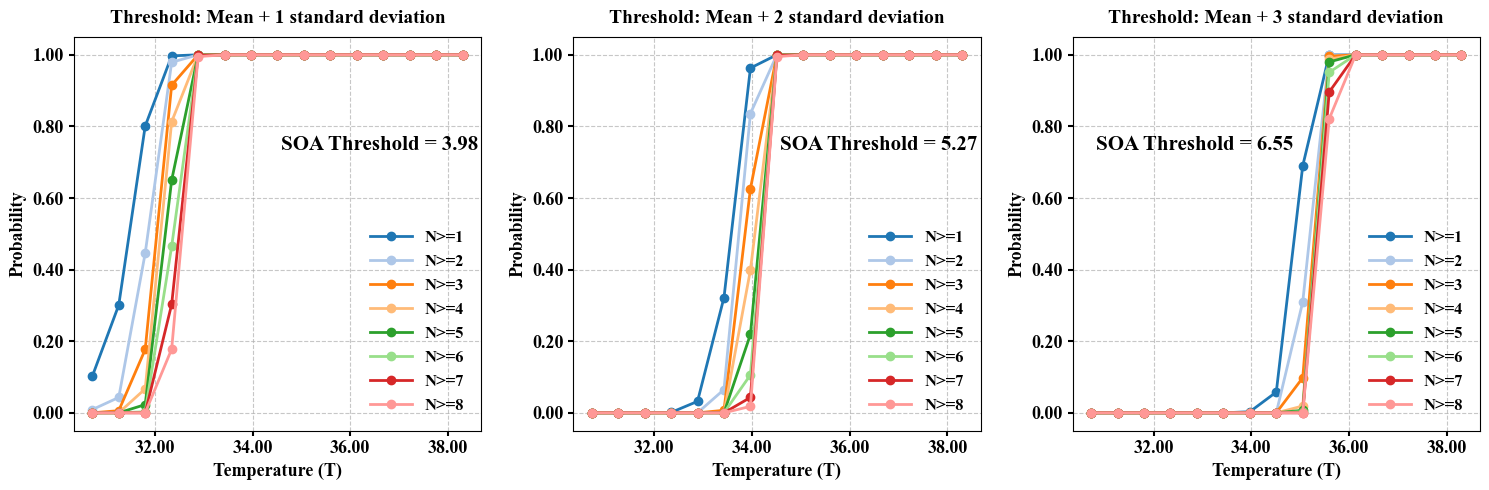

In [14]:
from palettable.tableau import Tableau_20
colors = Tableau_20.mpl_colors
# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
threshold_labels = ["Mean + 1 standard deviation", "Mean + 2 standard deviation", "Mean + 3 standard deviation"]

for idx, (threshold, ax) in enumerate(zip(thresholds, axes)):
    for i in range(1, 9):
        ax.plot(
            T_values,
            probability_results[threshold][f"N>={i}"],
            label=f"N>={i}",
            color=colors[i - 1],
            marker="o",
            markersize=6,
            linewidth=2
        )
    # Set titles and axis labels
    ax.set_title(f"Threshold: {threshold_labels[idx]}", fontsize=14, weight='bold', pad=10)
    ax.set_xlabel("Temperature (T)", fontsize=13, weight='bold')
    ax.set_ylabel("Probability", fontsize=13, weight='bold')
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}"))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.2f}"))
    ax.tick_params(axis='both', which='major', labelsize=13, width=1.5)
    ax.legend( loc="lower right", frameon=False, handlelength=2.5, borderpad=0.5,  prop={'size': 12, 'weight': 'bold'})
    ax.grid(visible=True, linestyle='--', alpha=0.7)

    # Add SOA threshold text at the top of the plot
    if idx!=2:
        ax.text(
            0.75, 0.7, f"SOA Threshold = {threshold:.2f}", 
            fontsize=15, weight='bold', ha='center', va='bottom', transform=ax.transAxes
        )
    else:
        ax.text(
            0.3, 0.7, f"SOA Threshold = {threshold:.2f}", 
            fontsize=15, weight='bold', ha='center', va='bottom', transform=ax.transAxes
        )
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

# Adjust figure title, layout, and save
plt.tight_layout()
plt.subplots_adjust()
plt.savefig("极端超标.svg", bbox_inches='tight') 
plt.show()